<a href="https://colab.research.google.com/github/020/020.github.io/blob/master/ml_admission_binary_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
!pip install pycaret

In [64]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [65]:
import pandas as pd

In [66]:
dataset = pd.read_csv('/content/vw_emergency_episode_10000_less_fields.csv')  

In [68]:
dataset.head()

,establishment_code,sequence_number,sex,ethnicity,marital_status,interpreter_required,employment_status,occupation,triage_category,visit_type,...,affected_by_drugs_and_or_alcohol,likely_meth_related_attendance,self_harm_attendance,suicide_attempt_or_at_risk_of_suicide,mental_health_consult,age,department_of_veteran_affairs_card_colour,remoteness_area_2011,remoteness_area_2016,emergency_department_information_system_covid19_flag
0,642,1101101952,1,9,6,9,NaN,NaN,3,1,...,0,0,0,0,NaN,38,9,NaN,NaN,0
1,208,1101101951,2,9,6,9,NaN,NaN,2,1,...,0,0,0,0,NaN,66,9,NaN,NaN,0
2,105,1101101950,1,9,6,9,NaN,NaN,2,1,...,0,0,0,0,NaN,33,9,NaN,NaN,0
3,106,1101101949,1,9,6,9,NaN,NaN,4,1,...,0,0,0,0,NaN,32,9,NaN,NaN,0
4,208,1101101948,1,9,6,9,NaN,NaN,3,1,...,0,0,0,0,NaN,24,9,NaN,NaN,0


In [69]:
dataset.shape

(10000, 64)

In [70]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (9500, 64)
Unseen Data For Predictions: (500, 64)


In [72]:
from pycaret.classification import *

In [73]:
admission_test = setup(data = data, target = 'admission', session_id=123) 

,Description,Value
0,session_id,123
1,Target,admission
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(9500, 64)"
5,Missing Values,True
6,Numeric Features,5
7,Categorical Features,58
8,Ordinal Features,False
9,High Cardinality Features,False


In [74]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8464,0.9193,0.6661,0.7429,0.7018,0.5989,0.6010,0.861
gbc,Gradient Boosting Classifier,0.8362,0.9060,0.5609,0.7743,0.6493,0.5463,0.5591,25.519
ridge,Ridge Classifier,0.8358,0.0000,0.6080,0.7417,0.6679,0.5602,0.5654,2.418
ada,Ada Boost Classifier,0.8353,0.9077,0.6218,0.7321,0.6720,0.5631,0.5668,6.536
et,Extra Trees Classifier,0.8310,0.8964,0.5222,0.7840,0.6262,0.5227,0.5411,9.134
rf,Random Forest Classifier,0.8234,0.8926,0.4751,0.7923,0.5930,0.4894,0.5160,6.410
dt,Decision Tree Classifier,0.7899,0.7306,0.6008,0.6177,0.6081,0.4648,0.4656,1.709
lr,Logistic Regression,0.7284,0.5038,0.0000,0.0000,0.0000,0.0000,0.0000,1.727
svm,SVM - Linear Kernel,0.7284,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.570
dummy,Dummy Classifier,0.7284,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.073


In [55]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7850,0.7478,0.6667,0.5911,0.6266,0.4764,0.4781
1,0.8075,0.7615,0.6611,0.6398,0.6503,0.5175,0.5177
2,0.8195,0.7540,0.6111,0.6875,0.6471,0.5264,0.5281
3,0.7940,0.7288,0.5856,0.6310,0.6074,0.4681,0.4687
4,0.8075,0.7415,0.5967,0.6626,0.6279,0.4986,0.4998
5,0.7759,0.7025,0.5414,0.5976,0.5681,0.4173,0.4183
6,0.7774,0.7347,0.6409,0.5829,0.6105,0.4552,0.4562
7,0.7835,0.7146,0.5635,0.6108,0.5862,0.4399,0.4405
8,0.7774,0.7191,0.5912,0.5912,0.5912,0.4383,0.4383


In [56]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [57]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7940,0.8415,0.5278,0.6463,0.5810,0.4463,0.4503
1,0.8015,0.8480,0.5111,0.6765,0.5823,0.4554,0.4631
2,0.8090,0.8551,0.4611,0.7345,0.5666,0.4522,0.4723
3,0.8120,0.8517,0.4862,0.7333,0.5847,0.4696,0.4862
4,0.7789,0.8375,0.3481,0.6848,0.4615,0.3406,0.3715
5,0.8000,0.8230,0.5856,0.6463,0.6145,0.4799,0.4810
6,0.7910,0.8408,0.5912,0.6221,0.6062,0.4641,0.4644
7,0.8015,0.8549,0.5912,0.6485,0.6185,0.4847,0.4857
8,0.8000,0.8288,0.5856,0.6463,0.6145,0.4799,0.4810


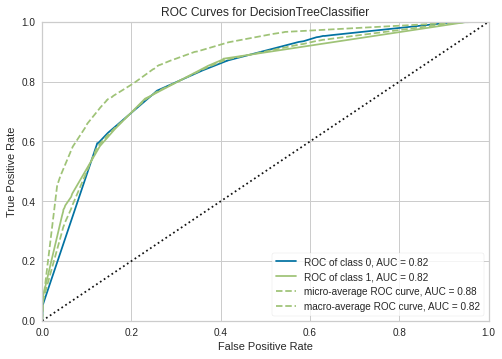

In [58]:
plot_model(tuned_dt, plot = 'auc')

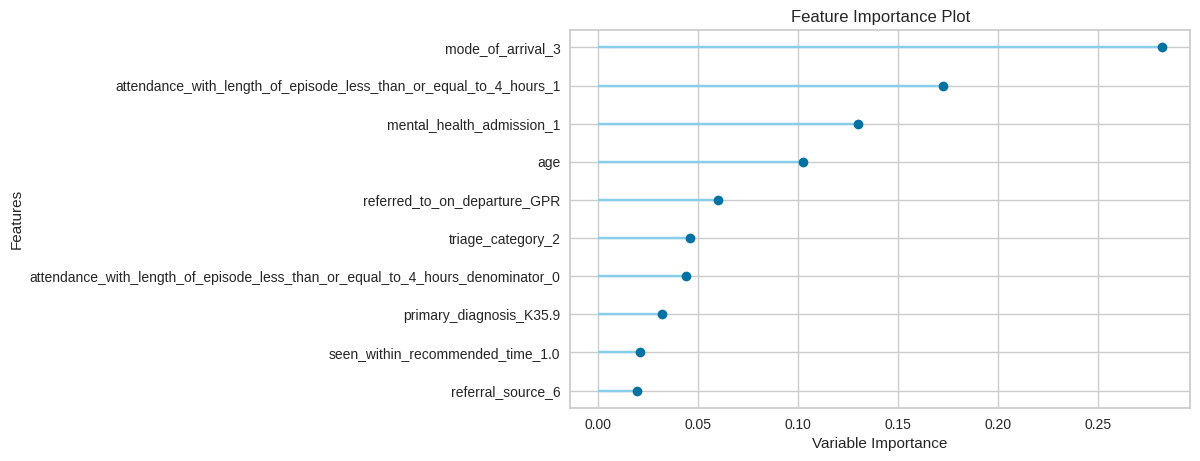

In [59]:
plot_model(tuned_dt, plot='feature')

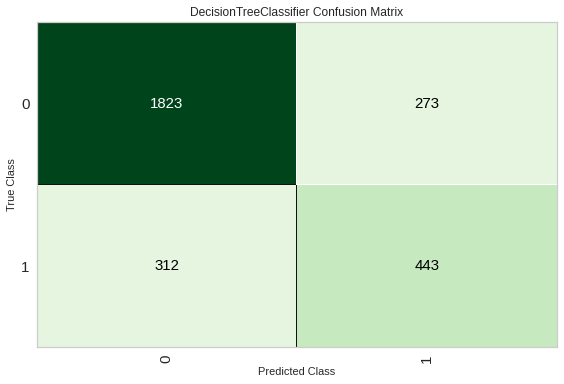

In [61]:
plot_model(tuned_dt, plot = 'confusion_matrix')

In [62]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [76]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8376,0.9125,0.6722,0.7118,0.6914,0.5813,0.5818
1,0.8496,0.9263,0.6722,0.7469,0.7076,0.6068,0.6083
2,0.8677,0.9278,0.7056,0.7840,0.7427,0.6540,0.6556
3,0.8421,0.9079,0.6685,0.7289,0.6974,0.5909,0.5919
4,0.8331,0.9075,0.5801,0.7500,0.6542,0.5465,0.5544
5,0.8451,0.9153,0.6409,0.7532,0.6925,0.5899,0.5934
6,0.8391,0.9173,0.7017,0.7056,0.7036,0.5932,0.5932
7,0.8617,0.9336,0.6906,0.7764,0.7310,0.6383,0.6403
8,0.8466,0.9205,0.6630,0.7453,0.7018,0.5990,0.6009


In [77]:
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [78]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8361,0.9060,0.6556,0.7152,0.6841,0.5737,0.5747
1,0.8286,0.9029,0.6056,0.7171,0.6566,0.5435,0.5469
2,0.8541,0.9143,0.6611,0.7677,0.7104,0.6137,0.6167
3,0.8301,0.9011,0.5856,0.7361,0.6523,0.5418,0.5480
4,0.8150,0.8979,0.5359,0.7132,0.6120,0.4938,0.5025
5,0.8361,0.9003,0.6022,0.7466,0.6667,0.5596,0.5653
6,0.8346,0.8999,0.6354,0.7233,0.6765,0.5660,0.5681
7,0.8556,0.9217,0.6298,0.7972,0.7037,0.6100,0.6174
8,0.8376,0.9030,0.6077,0.7483,0.6707,0.5645,0.5699


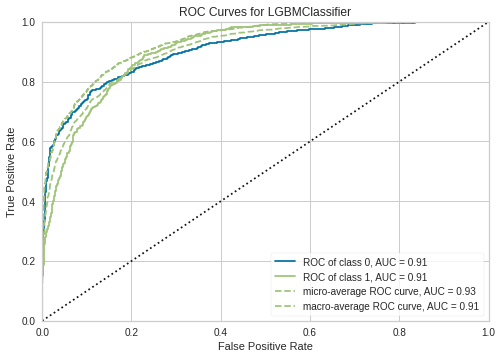

In [79]:
plot_model(tuned_lightgbm, plot = 'auc')

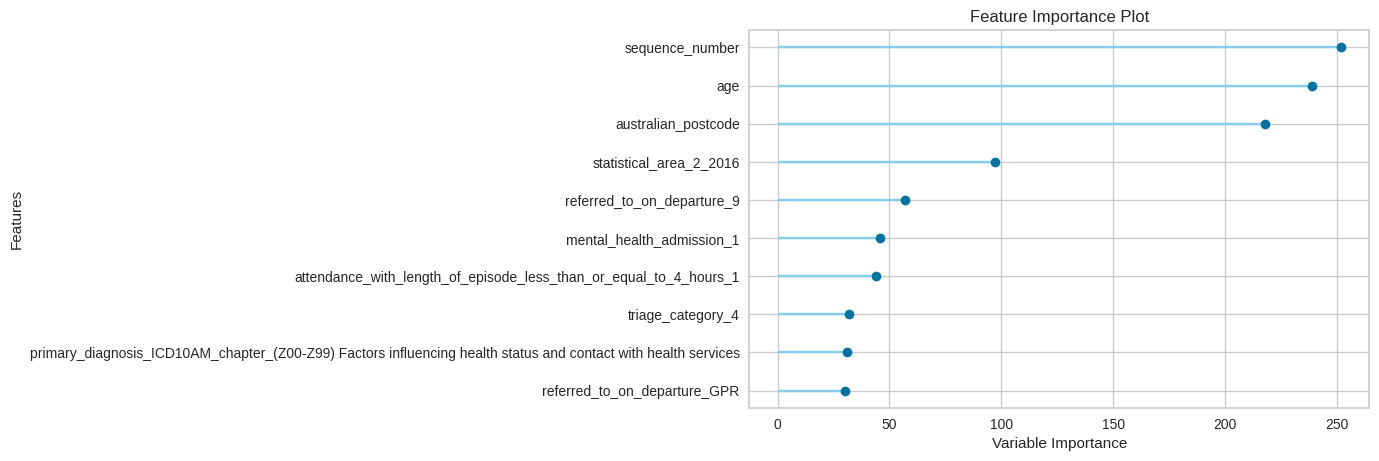

In [80]:
plot_model(tuned_lightgbm, plot='feature')

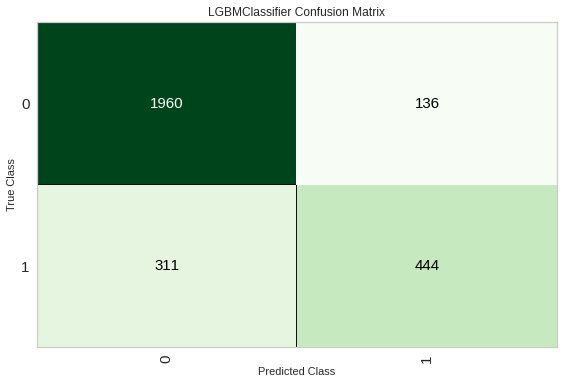

In [81]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')